# Coding a Computer Vision Neural Network

## Model 1

In [1]:
# importando o framework tensorflow (usando o keras)
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow
# importando o pacote matemático numpy
import numpy as np
# importando o pacote de visualização de dados matplotlib
import matplotlib.pyplot as plt

In [2]:
# carregando o dataset
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# carregando os exemplos de treinamento e exemplos de teste do dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# definindo rótulos para todos os dados de saída númericos
classes = {0: 'shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
           4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
           8: 'Bag', 9: 'Ankle boot'}

'shirt/top'

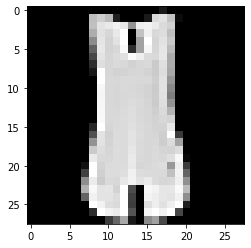

In [5]:
# visualizando com as imagens estão armazenadas
index = 4
imshow(train_images[index], cmap='gray')
classes[train_labels[index]]

In [6]:
# visualizando as dimensões dos dados
print('train shape: {}'.format(train_images.shape))
print('train labels shape: {}'.format(train_labels.shape))
print('test shape: {}'.format(test_images.shape))
print('test labels shape: {}'.format(test_labels.shape))

train shape: (60000, 28, 28)
train labels shape: (60000,)
test shape: (10000, 28, 28)
test labels shape: (10000,)


In [7]:
# definindo um modelo da rede neural
# == camada de entrada: transforma as entradas bidimensionais em uma camada achatada unidimensional ==
# == primeira camada oculta: possui 128 neurônios (28 x 28) com uma função de ativação relu ==
# == segunda camada oculta / camada de saída: possui 10 neurônios (correspondente a todos os rótulos) e com uma função de ativação softmax ==
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)
])

Ankle boot
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233

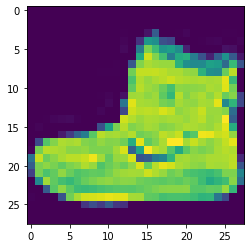

In [8]:
# definindo configurações de impressão
np.set_printoptions(linewidth=200)
# visualizando a imagem bidimensional
plt.imshow(train_images[0])
# visualizando a classe a qual a imagem pertence
print(classes[train_labels[0]])
# visualizando o array bidimensional da imagem em questão
print(train_images[0])

In [9]:
# realizando a normalização nas imagens de treinamento e de teste 
train_images = train_images / 255
test_images = test_images / 255

In [10]:
# configurando os detalhes da compilação do modelo
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
# realizando o treinamento do modelo
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6268 - accuracy: 0.7802
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.8878
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.8915


In [12]:
# usando os dados de teste para testar a capacidade de generalização do modelo
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8733


[0.35715362429618835, 0.8733000159263611]

In [13]:
# realizando a predição em cada imagem de teste
classifications = model.predict(test_images)
# observe que a saída é a porcentagem de uma determinada imagem pertencer a uma determinada classe 
# (função de ativação na saída é do tipo softmax, para 10 neurônios dessa camada e 10 classes possíveis)
classifications[0]

array([2.67376490e-05, 1.03073523e-06, 2.51393849e-05, 1.12673515e-05, 1.50829337e-05, 2.40795445e-02, 3.95375500e-05, 3.86070535e-02, 2.56261210e-05, 9.37168956e-01], dtype=float32)

## Model 2

In [14]:
# baixando e carregando os dados de treinamento e dados de teste
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

In [15]:
# realizando a normalização nos dados
training_images = training_images / 255
testing_images = testing_images /255

In [16]:
# definindo o modelo da rede neural
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [17]:
# configurando os detalhes da compilação do modelo
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# realizando o treinamento do modelo com os dados de treinamento
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5862 - accuracy: 0.7922
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3679 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3248 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3006 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2747 - accuracy: 0.8968


In [19]:
# usando os dados de teste para testar a capacidade de generalização do modelo
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8740


[0.3470785617828369, 0.8740000128746033]

In [20]:
# verificando um exemplo de predição
classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])

[3.7959941e-07 2.5339471e-09 4.7845616e-09 7.1059721e-11 8.9538394e-09 4.2735557e-03 3.8169016e-08 1.1216225e-02 3.0706323e-07 9.8450941e-01]
9


## Model 3

In [21]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# adicionando mais uma camada oculta (mudando a quantidade de neurônios da camada também)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5747 - accuracy: 0.7937
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3617 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3247 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2917 - accuracy: 0.8908
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8788
[7.0733743e-09 5.6782471e-11 8.3588171e-12 1.2483296e-09 6.4423161e-11 1.5808021e-03 2.3573193e-10 6.0502737e-04 2.8257054e-09 9.9781418e-01]
9


In [22]:
# usando os dados de teste para testar a capacidade de generalização do modelo
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8788


[0.3463383913040161, 0.8787999749183655]

## Model 4

In [23]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# voltando a definição da rede neural do modelo 1 (porém adicionando mais treinamento)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# aumentando a quantidade de épocas para treinamento da rede neural
model.fit(training_images, training_labels, epochs = 30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6367 - accuracy: 0.7820
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3795 - accuracy: 0.8633
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8763
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3068 - accuracy: 0.8892
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8906
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.8940
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2625 - accuracy: 0.9025
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9062
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2431 - accuracy: 0.9107
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [24]:
# usando os dados de teste para testar a capacidade de generalização do modelo
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8908


[0.3825541138648987, 0.8907999992370605]

## Model 5

In [25]:
# interrompendo um treinamento quando ele chega em um certo limiar
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training =True


In [26]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5777 - accuracy: 0.7952
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3607 - accuracy: 0.8683

Reached 60% accuracy so cancelling training!


In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8583


[0.41095489263534546, 0.858299970626831]